# Features exercise

Exercises from [ChatGPT](https://chatgpt.com/g/g-p-68dc6d2bd7088191b715d3da4806e88b/c/68de525c-f588-832c-a4f9-33d9294fb427)

## Exercise 1 - Load and inspect data

In [1]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exercise 2 - Encode categorical features

In [2]:
df_encoded = pd.get_dummies(df[['sex', 'class', 'embarked']], drop_first=True)
df_encoded.head()

,sex_male,class_Second,class_Third,embarked_Q,embarked_S
0,True,False,True,False,True
1,False,False,False,False,False
2,False,False,True,False,True
3,False,False,False,False,True
4,True,False,True,False,True


## Exercise 3 - Scale numerical features

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler
df_scaled = scaler.fit_transform(df[['age', 'fare']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Part 2 - Image features

## Exercise 4 - Edge detection

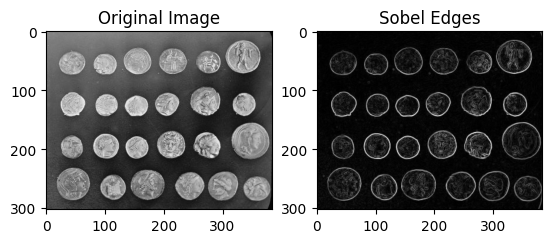

In [4]:
from skimage import data, filters
import matplotlib.pyplot as plt

image = data.coins()
edges = filters.sobel(image)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap=plt.cm.gray)
plt.title('Sobel Edges')
plt.show()



## Exercise 5 - Use a Pretrained CNN for Feature Extraction

In [5]:
import numpy as np
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vg_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [6]:
model = MobileNetV2(weights='imagenet')

img = image.load_img('data/dog.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

print(features.shape)
# The max feature is 264. You can see from here https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/ that the label is 
# "Cardigan, Cardigan Welsh" corgi and truly we have a dog
print(f'Max feature = {np.argmax(features, axis=1)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
(1, 1000)
Max feature = [264]


In [7]:
# Let's use the decode prediction function to get the image class without doing the lookup
list_of_predictions = decode_predictions(features, top=5)
print(f'Label = {list_of_predictions[0][0][1]}')
list_of_predictions

Label = Cardigan


[[('n02113186', 'Cardigan', np.float32(0.14190532)),
  ('n02106662', 'German_shepherd', np.float32(0.098097675)),
  ('n02096294', 'Australian_terrier', np.float32(0.09380948)),
  ('n02105855', 'Shetland_sheepdog', np.float32(0.086885735)),
  ('n02106030', 'collie', np.float32(0.06313517))]]

## Part 3 - Text Features

## Exercise 6 - Bag of words representation

In [8]:
docs = ['Cats like milk', 'Dogs hate cats', 'Milk is healthy']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names_out())
print(x.shape)
print(x.toarray())

['cats' 'dogs' 'hate' 'healthy' 'is' 'like' 'milk']
(3, 7)
[[1 0 0 0 0 1 1]
 [1 1 1 0 0 0 0]
 [0 0 0 1 1 0 1]]


## Exercise 7 - Word Embeddings (Word2Vec)

In [10]:
from gensim.models import Word2Vec

sentences = [s.lower().split() for s in docs]
print(sentences)
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1)
model.wv.most_similar('cats')

[['cats', 'like', 'milk'], ['dogs', 'hate', 'cats'], ['milk', 'is', 'healthy']]


[('milk', 0.5436006188392639),
 ('healthy', 0.32937225699424744),
 ('like', -0.1799871176481247),
 ('is', -0.21133743226528168),
 ('dogs', -0.38205230236053467),
 ('hate', -0.5381841063499451)]

## Part 4 - Time-Series Features

## Exercise 8 - Generate Synthetic Time-Series

<Axes: title={'center': 'Synthetic Time-Series'}>

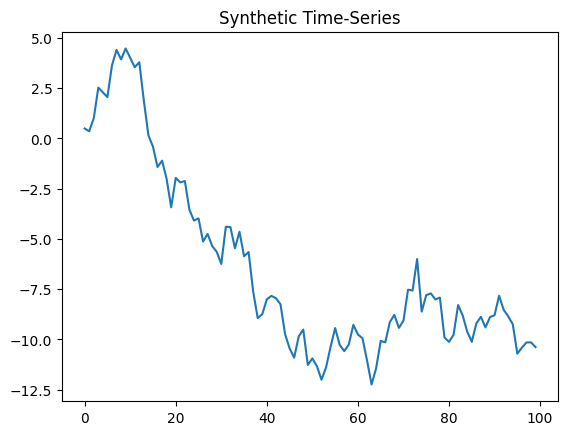

In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)
ts_data = pd.Series(np.random.randn(100).cumsum())
ts_data.plot(title='Synthetic Time-Series')

## Exercise 9 - Create Lag and Rolling Features

In [12]:
df = pd.DataFrame({'y' : ts_data})
print(df)
df['lag1'] = df['y'].shift(1)
df['rolling_mean_3'] = df['y'].rolling(window=3).mean()
df

            y
0    0.496714
1    0.358450
2    1.006138
3    2.529168
4    2.295015
..        ...
95 -10.712354
96 -10.416233
97 -10.155178
98 -10.150065
99 -10.384652

[100 rows x 1 columns]


,y,lag1,rolling_mean_3
0,0.496714,NaN,NaN
1,0.358450,0.496714,NaN
2,1.006138,0.358450,0.620434
3,2.529168,1.006138,1.297919
4,2.295015,2.529168,1.943441
...,...,...,...
95,-10.712354,-9.248839,-9.605974
96,-10.416233,-10.712354,-10.125809
97,-10.155178,-10.416233,-10.427922
98,-10.150065,-10.155178,-10.240492


# Part 5 - Audio Features

## Exercise 10 - Generate and Display a Spectrogram

In [13]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

/var/folders/zk/jyd8blln3wl4s_j0rh9gqsmm0000gn/T/ipykernel_1248/4219148168.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read('data/file_example_WAV_1MG.wav')


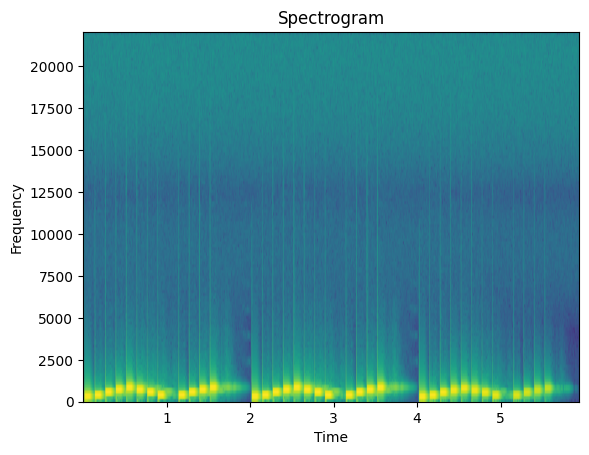

In [14]:
rate, data = wavfile.read('data/file_example_WAV_1MG.wav')

# Convert to mono if stereo
if data.ndim > 1:
    data = np.mean(data, axis=1)

plt.specgram(data, Fs=rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.show()
